1. Исправьте код применения оператора Собеля, который мы писали на занятии, таким образом, чтобы оператор применялся по обоим направлениям (x и y).


In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

(1444, 1016)

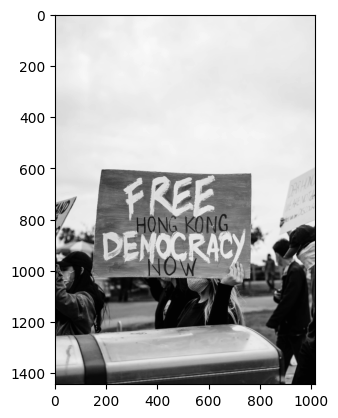

In [2]:
img = cv.imread("hong.png", 0)
plt.imshow(img, cmap="gray")
img.shape

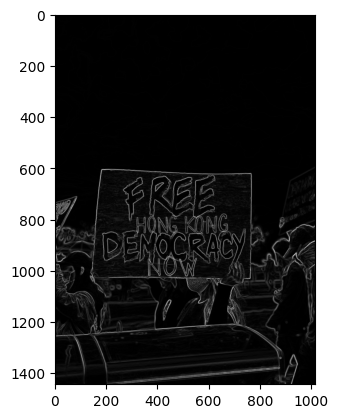

In [3]:
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)

sobelxy = np.sqrt(sobelx**2 + sobely**2)
plt.imshow(sobelxy, cmap="gray")


3. К изображению hong.png из папки необходимо подобрать такую морфологическую операцию, чтобы устранить с таблички слова, написанные черным цветом

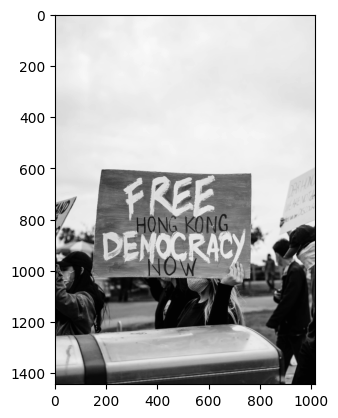

In [4]:
img = cv.imread("hong.png", 0)
plt.imshow(img, cmap="gray")

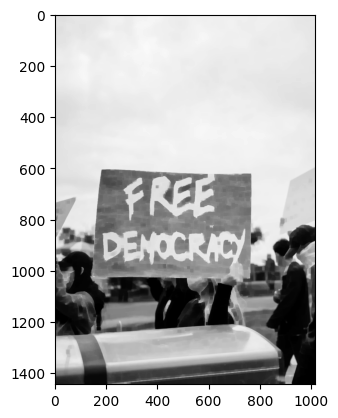

In [5]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (11, 11))
image_res = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
plt.imshow(image_res, cmap="gray")

2. На занятии мы попробовали несколько фильтров различного назначения (это размытие, устранение шумов, выделение границ и тд). Каждый алгоритм, осуществляющий фильтрацию изображения, обычно имеет несколько параметров, влияющих на результат (размер ядра и тд). И для того, чтобы понять, какое именно влияние оказывают каждый из параметров или их комбинация, может потребоваться перезапустить код много раз с разными значениями параметров, что не удобно. Поэтому в этом задании вам предлагается создать оконное приложение, отображающее результат применения того или иного фильтра (можете выбрать любой, например, Canny), интерфейс (кнопки, чек-боксы, ползунки и тд), позволяющий варьировать значения параметров фильтра и смотреть, как это влияет на результат в реальном времени (обновляя выводимое изображение). Пример реализации такого интерфейса на OpenCV можно найти здесь: https://docs.opencv.org/4.x/d9/dc8/tutorial_py_trackbar.html


In [6]:
def filter(image, filter_type, **kwargs):

    if filter_type == 'blur':
        kernel_size = kwargs.get('kernel_size')
        return cv.blur(image, (kernel_size, kernel_size))
    elif filter_type == 'noise_reduction':
        kernel_size = kwargs.get('kernel_size')
        return cv.medianBlur(image, kernel_size)
    else:
        return image

In [7]:
def update():

    global image, filter_type, kwargs
    
    filtered_image = filter(image.copy(), filter_type, **kwargs)
    cv.imshow('Window', filtered_image)

In [8]:
def on_trackbar_change(value):
   
    global kwargs

    kwargs['kernel_size'] = value if value % 2 == 1 and value > 0 else value + 1
    update()

In [9]:
def on_checkbox_change(value):
    
    global filter_type, kwargs

    if value == 0:
        filter_type = 'blur'
    else:
        filter_type = 'noise_reduction'
    
    update()

In [12]:
image = cv.imread('hong.png')
height, width = image.shape[:2]
switch = '0: Blur \n 1: Noise'
filter_type = 'blur'
kwargs = {'kernel_size': 1}

cv.namedWindow('Window', cv.WINDOW_GUI_NORMAL)
cv.resizeWindow('Window', width // 2, height // 2) 
cv.createTrackbar(switch, 'Window', 0, 1, on_checkbox_change)
cv.createTrackbar('Parameter', 'Window', 0, 255, on_trackbar_change)

update()

cv.waitKey(0)
cv.destroyAllWindows()